<a href="https://www.kaggle.com/code/yujansaya/mall-customer-segmentation-with-k-means-and-hc?scriptVersionId=160393558" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Mall Customer Segmentation with K-Means and Hierarchical Clustering applying PCA, and further Data visualization.</h1>

**Import Context**
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content**
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


<h1 style="bold">Data Preprocessing</h1>

**Import the dataset and check for missing and duplicated values.**

We are going to compare K-Means and Hierarchical Clustering, as well as both using all the provided features except Customer ID in order to apply PCA and just hand-picking 2 features.

In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
X = data.iloc[:, -2:].values        # manually choose only 2 components (Income and Spending Score)
X_pca = data.iloc[:, 1:].values     # to further apply PCA for columns 2 to 5
data.isnull().values.any()

False

**Familiarize with the dataset.**

In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.duplicated().any()

False

**Visualize the given dataset.**

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >,
        <Axes: >]], dtype=object)

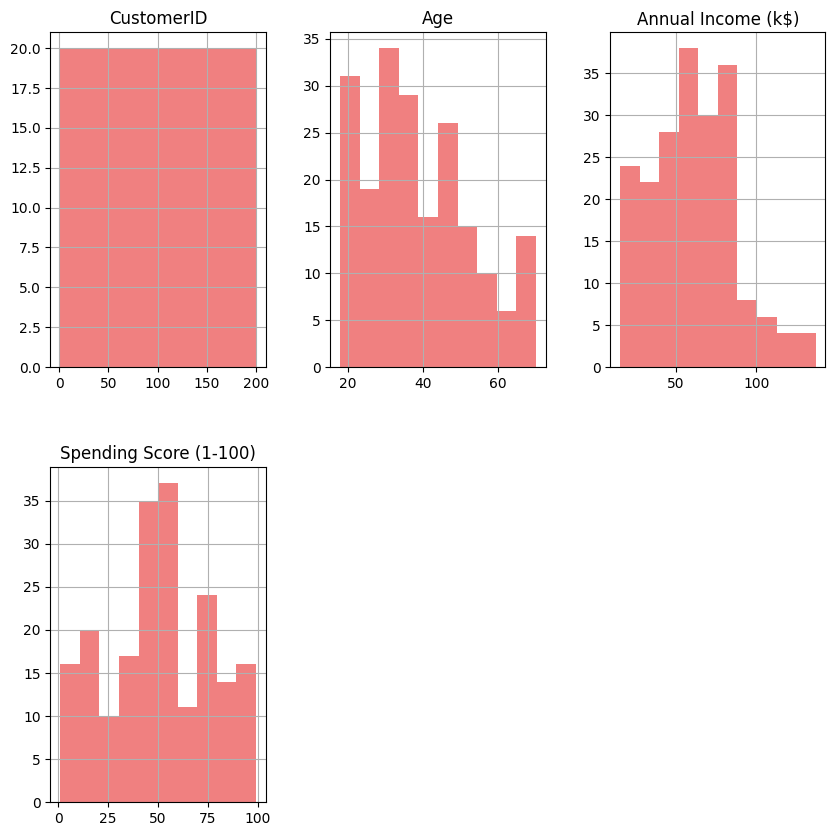

In [5]:
#data.drop(columns = 'CustomerID', inplace=True)
data.hist(figsize=(10,10), color='lightcoral', layout=(2,3))

CustomerID                   Axes(0.125,0.53;0.227941x0.35)
Age                       Axes(0.398529,0.53;0.227941x0.35)
Annual Income (k$)        Axes(0.672059,0.53;0.227941x0.35)
Spending Score (1-100)       Axes(0.125,0.11;0.227941x0.35)
dtype: object

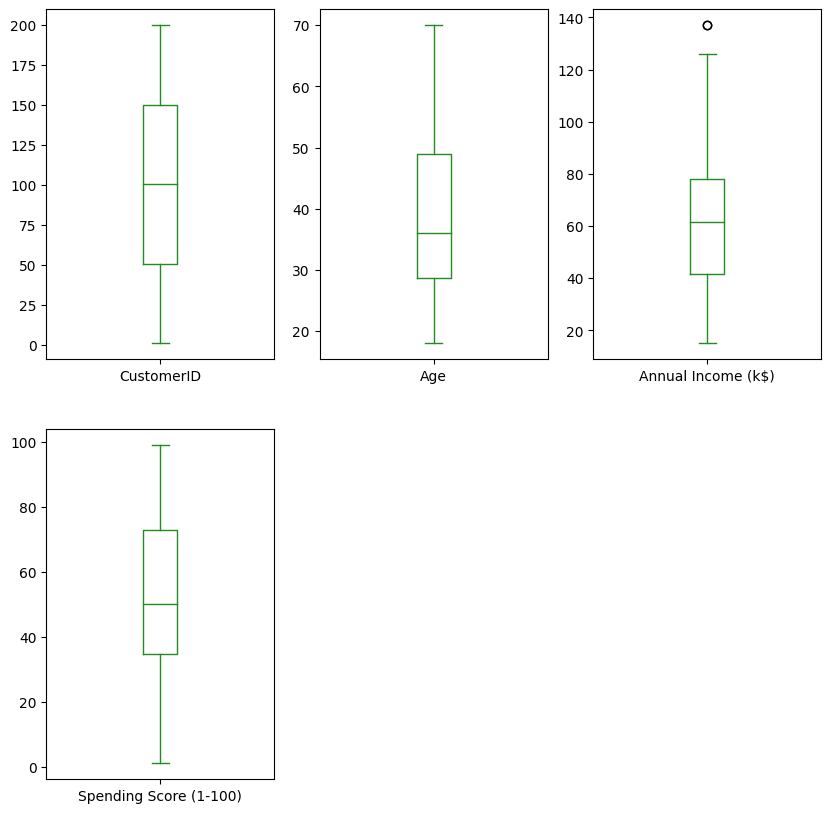

In [6]:
data.plot(kind='box', subplots=True, layout=(2,3), figsize=(10,10),color='forestgreen')

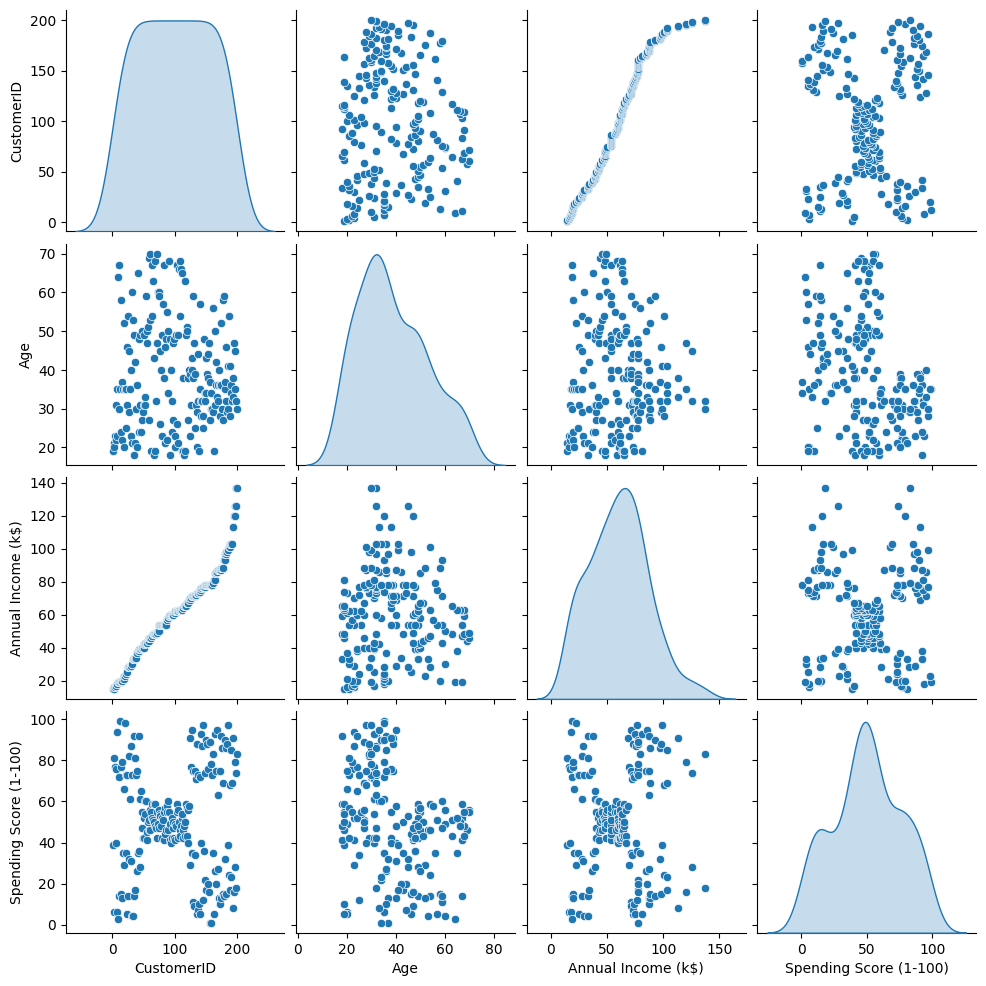

In [7]:
sns.pairplot(data, diag_kind='kde', kind="scatter")

**Apply One Hot Encoding to the "Gender" columnn (for PCA).**

In [8]:
l_encoder = LabelEncoder()
X_pca[:, 0] = l_encoder.fit_transform(X_pca[:, 0])

**Feature Scale the dataset.**

In [9]:
scaler1 = StandardScaler()      # for manually chosen dataset
X_s = scaler1.fit_transform(X)
scaler2 = StandardScaler()      # for 4 elements dataset to be applied PCA
X_pca = scaler2.fit_transform(X_pca)

**Apply Principal component analysis (PCA)**

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

**K-Means Clustering:** apply the Elbow Mthod to decide with the number of clusters.

In [11]:
wcss = {
    "manual": [],
    "pca": []
}
for i in range(2,15):
  kmeans1 = KMeans(n_clusters=i, init='k-means++')
  kmeans2 = KMeans(n_clusters=i, init='k-means++')
  kmeans1.fit(X_s)
  kmeans2.fit(X_pca)
  wcss["manual"].append(kmeans1.inertia_)
  wcss["pca"].append(kmeans2.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

**K-Means Clustering:** apply the Elbow Mthod to decide with the number of clusters.

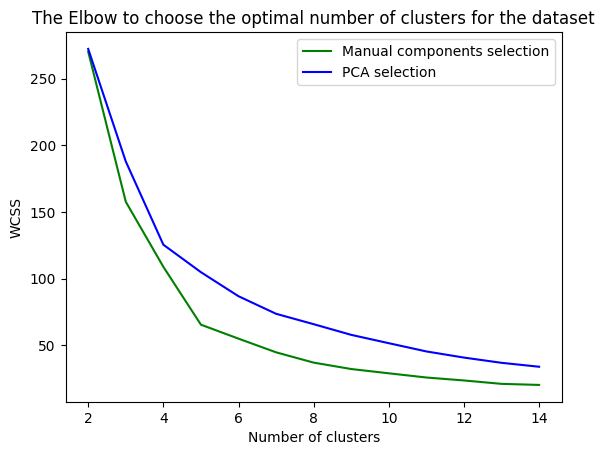

In [12]:
plt.plot(range(2,15), wcss["manual"], c="g", label="Manual components selection")
plt.plot(range(2,15), wcss["pca"], c="b", label="PCA selection" )
plt.title('The Elbow to choose the optimal number of clusters for the dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

**K-Means Clustering:** implement the algorithm.

In [13]:
k_means_manual = KMeans(n_clusters=5, init='k-means++')
y_pred_manual = k_means_manual.fit_predict(X_s)
k_means_pca = KMeans(n_clusters=5, init='k-means++')
y_pred_pca = k_means_pca.fit_predict(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**K-Means Clustering:** visualize the clusters.

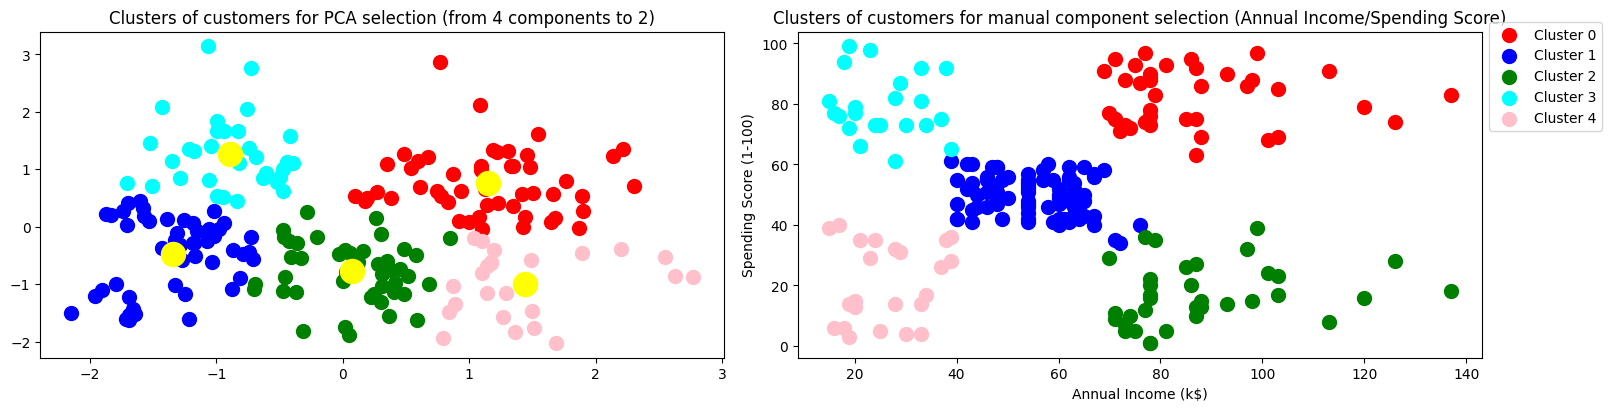

In [14]:
colors=['red', 'blue', 'green', 'cyan', 'pink']
fig,ax = plt.subplots(1,2,figsize=(16,4), layout='constrained')

for i in range(5):
    ax[0].scatter(X_pca[y_pred_pca == i, 0], X_pca[y_pred_pca == i, 1], s = 100, c = colors[i], label = f'Cluster {i}')
    ax[1].scatter(X[y_pred_manual == i, 0], X[y_pred_manual == i, 1], s = 100, c = colors[i], label = f'Cluster {i}')
ax[0].scatter(k_means_pca.cluster_centers_[:, 0], k_means_pca.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
ax[0].set_title('Clusters of customers for PCA selection (from 4 components to 2)')
ax[1].set_title('Clusters of customers for manual component selection (Annual Income/Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.show()

**Hierarchical Clustering**: choose the number of clusters using dendogram.


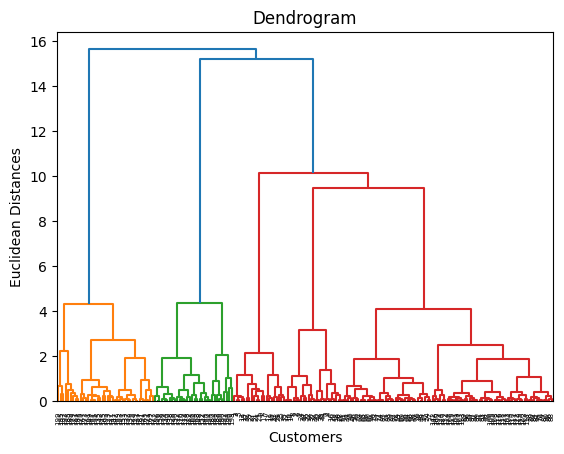

In [15]:
dendrogram = sch.dendrogram(sch.linkage(X_s, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()
#clearly 5 clusters

**Hierarchical Clustering:** implement the algorithm.

In [16]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc_pca = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_s)
y_hc_pca = hc_pca.fit_predict(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Hierarchical Clustering:** visualize the predictions.

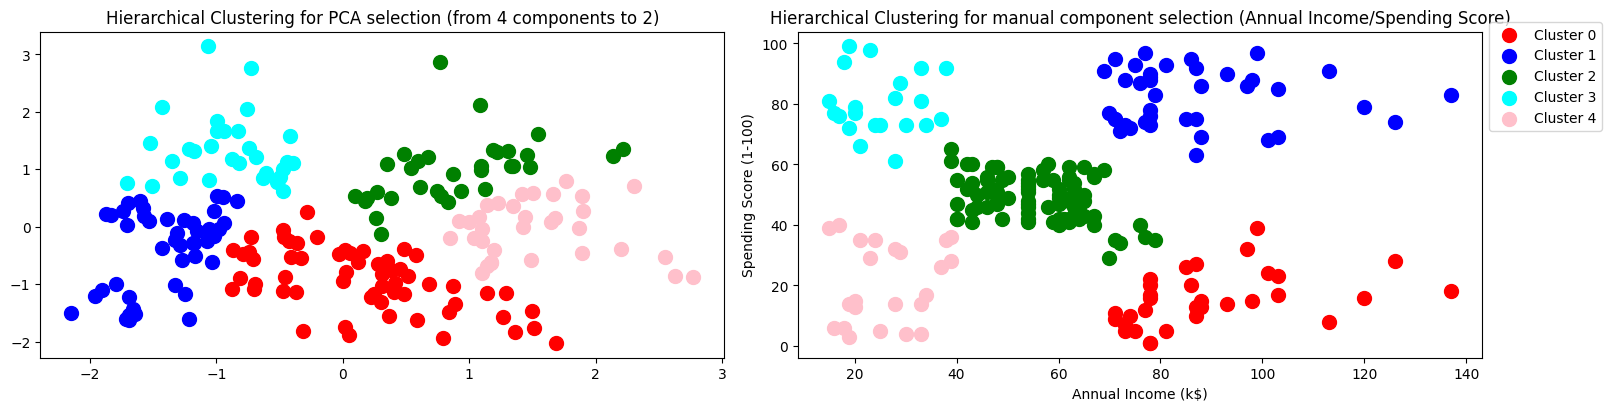

In [17]:
fig,ax = plt.subplots(1,2,figsize=(16,4), layout='constrained')

for i in range(5):
    ax[0].scatter(X_pca[y_hc_pca == i, 0], X_pca[y_hc_pca == i, 1], s = 100, c = colors[i], label = f'Cluster {i}')
    ax[1].scatter(X[y_hc == i, 0], X[y_hc == i, 1], s = 100, c = colors[i], label = f'Cluster {i}')
ax[0].set_title('Hierarchical Clustering for PCA selection (from 4 components to 2)')
ax[1].set_title('Hierarchical Clustering for manual component selection (Annual Income/Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.show()

**Make a prediction of 1 sample.**

In [18]:
test_pca = np.array([["Male", 20, 50, 65]])
test_manual = scaler1.transform(test_pca[:, -2:])

test_pca[:, 0] = l_encoder.transform(test_pca[:,0])
test_pca = scaler2.transform(test_pca)
test_pca = pca.transform(test_pca)      # apply all data pre-processing

y_k_m = k_means_manual.predict(test_manual)
y_k_pca = k_means_pca.predict(test_pca)

print(f"Kmeans clustering prediction for manual: {y_k_m} and for pca: {y_k_pca}")

Kmeans clustering prediction for manual: [1] and for pca: [3]


**Analyzing on entire dataset the predictions of each approach**

K-Means and manual feature selection (Annual Income and Spending Score).

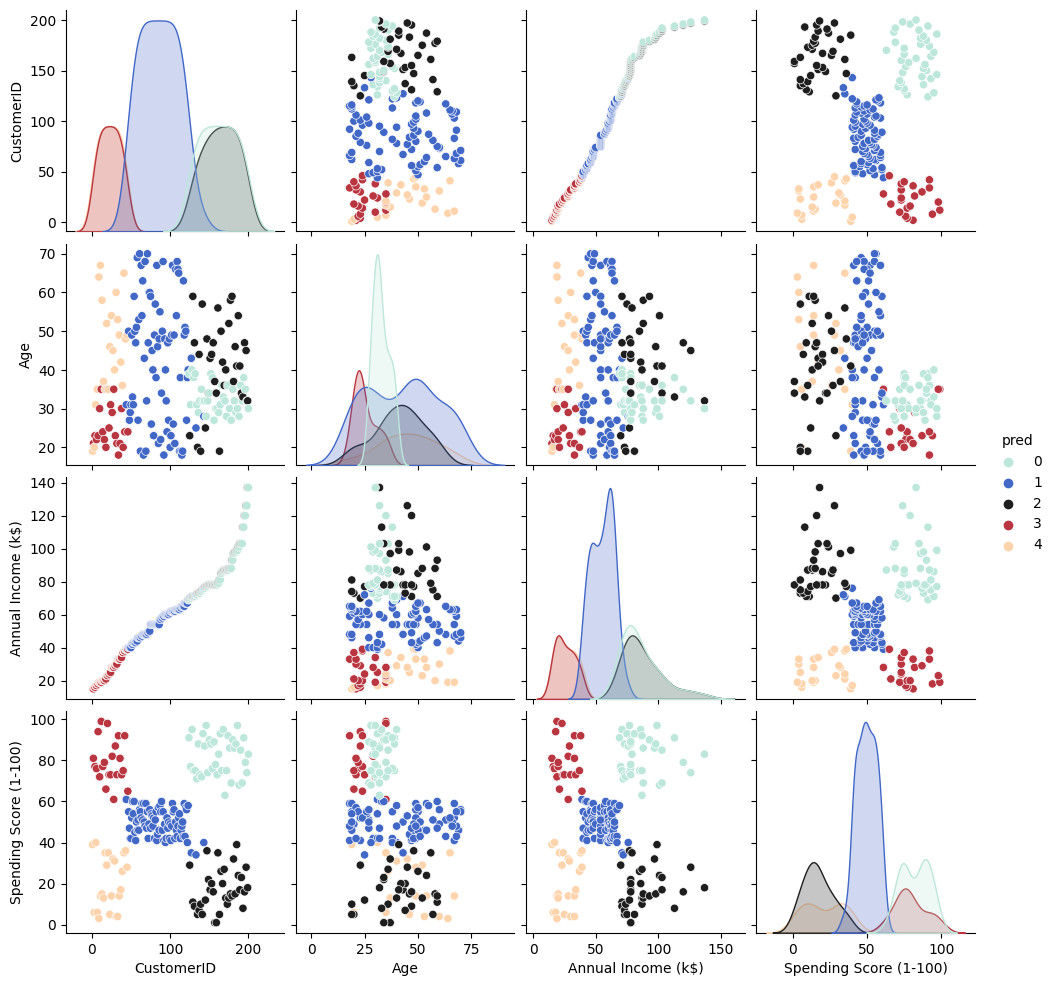

In [19]:
data["pred"] = y_pred_manual
sns.pairplot(data, diag_kind='kde', kind="scatter", hue="pred", palette="icefire")

K-Means and PCA dimension reduction to 2 features.

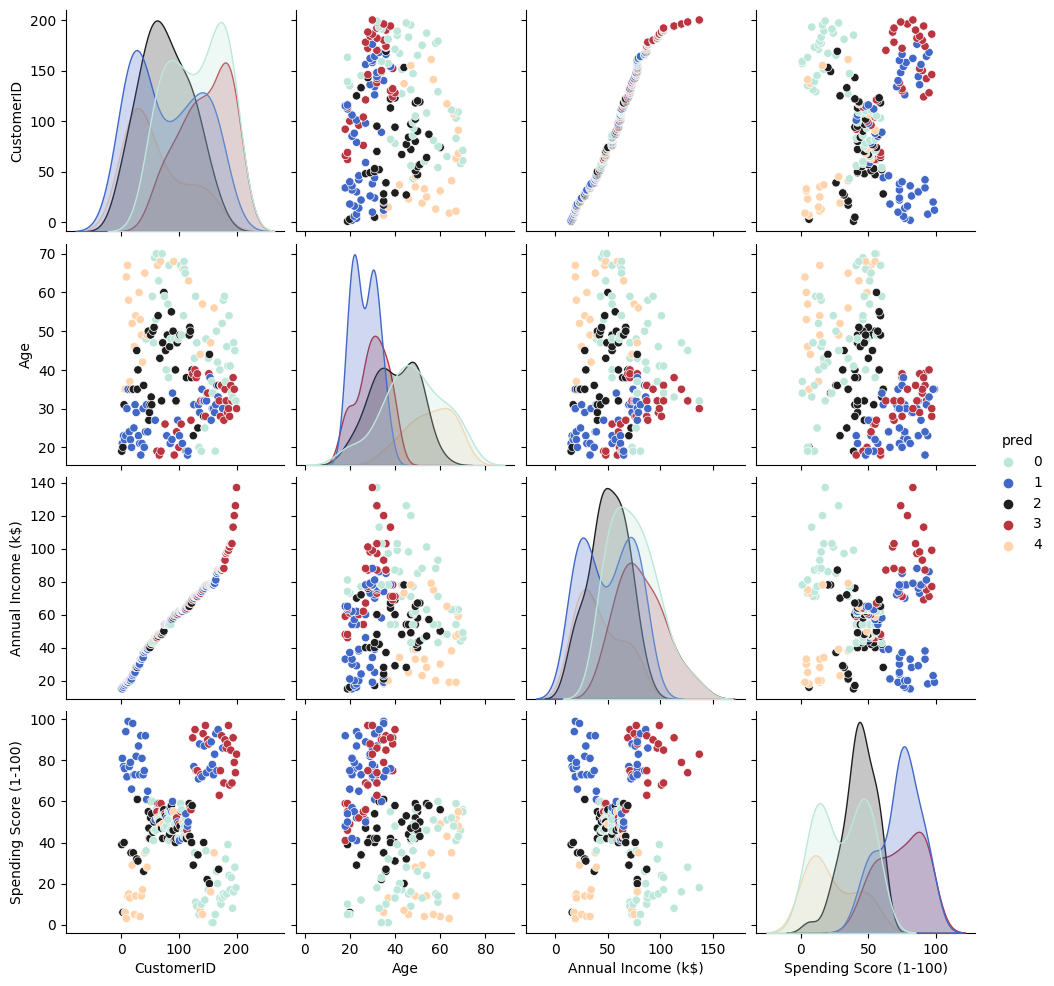

In [20]:
data["pred"] = y_pred_pca
sns.pairplot(data, diag_kind='kde', kind="scatter", hue="pred", palette="icefire")

Hierarchical Clustering and manual feature selection (Annual Income and Spending Score).

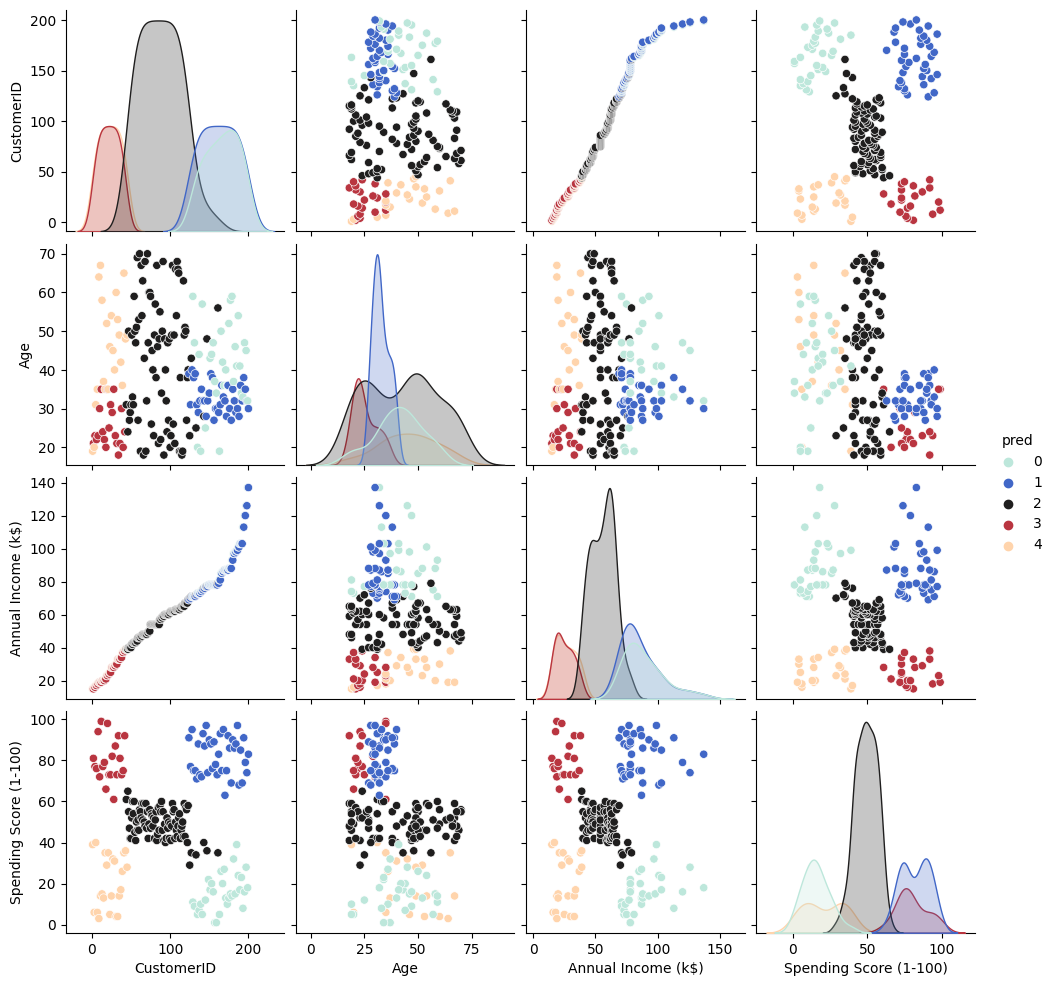

In [21]:
data["pred"] = y_hc
sns.pairplot(data, diag_kind='kde', kind="scatter", hue="pred", palette="icefire")

Hierarchical Clustering and PCA dimension reduction to 2 features.

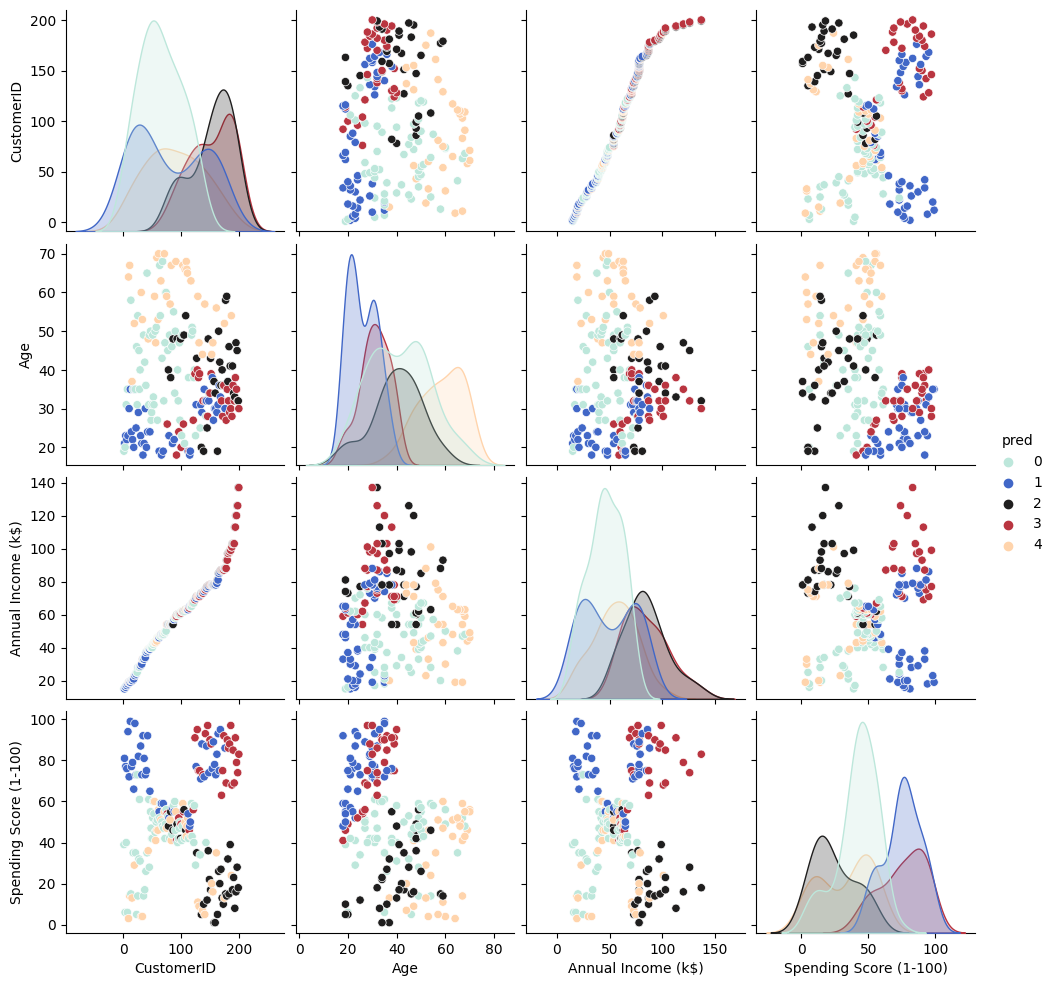

In [22]:
data["pred"] = y_hc_pca
sns.pairplot(data, diag_kind='kde', kind="scatter", hue="pred", palette="icefire")